In [3]:

from dwdynamics import ComplexDynamicsProblem, Objective,helpers,fixed_point,instance # Difference a. We are using ComplexDynamicsProblem
from dimod import ExactSolver
import numpy as np
import scipy
import pandas as pd
import numpy as np
import scipy as sp
import math
import pprint
import qutip as qp
import dimod


In [18]:
# Let's compute baseline using QuTiP
import qutip as qp

#instance = 8
#PSI0_2 = np.array([1,0,0,0],dtype=np.complex128)
#instance_dict = helpers.get_instance(instance)
#H = instance_dict['H']
#PSI0 = instance_dict['psi0']

i = instance.Instance(8)
i.create_instance(2,2)
qubo = i.get_qubo()

exact_solver = ExactSolver()            
exact_result = exact_solver.sample(qubo)      
print(exact_result.first.energy)

psi_0 = qp.basis(2, 0)

times = np.linspace(0, 1, 100)
baseline = qp.mesolve(qp.Qobj(i.H), psi_0, times, e_ops=[qp.sigmaz()]).expect[0]
# Define sigma_z for manual computation of expected values
SZ = np.array([[1, 0], [0, -1]])

# decode_sample returns flat vector, we use reshape to form an 6x2 array of states
exact_vec = i.problem.interpret_sample(exact_result.first.sample)

# Difference d.: We use complex conjugation to compute expected values. For this example it shouldn't matter though.
# Then, for the expectation values we take only the real part, because otherwise matplotlib would complain.
exact_expect = [(state.conj() @ SZ @ state).real for state in exact_vec]
from matplotlib import pyplot as plt
print(exact_expect)



-------
sigma_y
---------
---------
array([[ 0.54030231+0.j, -0.84147098+0.j],
       [ 0.84147098+0.j,  0.54030231+0.j]])
------
0.4729068372958656
[np.float64(1.0), np.float64(0.0)]


In [13]:
exact_result.first.sample

{0: np.int8(1),
 1: np.int8(0),
 2: np.int8(0),
 3: np.int8(1),
 4: np.int8(0),
 5: np.int8(1),
 6: np.int8(0),
 7: np.int8(1),
 8: np.int8(1),
 9: np.int8(0),
 10: np.int8(0),
 11: np.int8(1),
 12: np.int8(1),
 13: np.int8(0),
 14: np.int8(0),
 15: np.int8(1)}

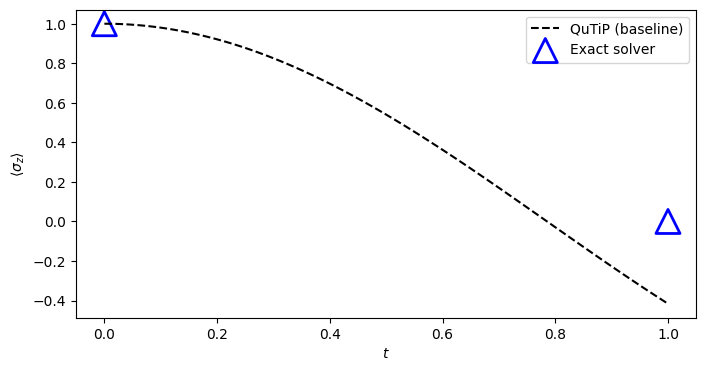

In [8]:
fig, axis = plt.subplots(figsize=(8, 4))

axis.plot(times, baseline, "k--", label="QuTiP (baseline)")

axis.scatter(i.problem.times, exact_expect, marker="^", lw=2, s=300, edgecolors="b", facecolors="none", label="Exact solver")

axis.set_ylabel(r"$\langle \sigma_z \rangle$")
axis.set_xlabel("$t$")
axis.legend()
plt.show()

In [20]:
i.to_xubo()

/home/atg205/Documents/__Dokumente/Uni/UPMC/stage gl/DWaveDynamics2/notebooks


In [12]:
for state in i.get_xubo_df()['State'].head(10):
    print(state)
    sample_vec = i.problem.interpret_sample(state)
    exact_expect = [(state.conj() @ SZ @ state).real for state in sample_vec]
    print(exact_expect)
    print("---------")

    

1010101010010101


TypeError: unsupported operand type(s) for +: 'int' and 'str'